In [1]:
import torch
from torch import nn

torch.__version__

'1.11.0+cu113'

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
%pwd

'/home/pranshumaan'

In [4]:
%cd /media/pranshumaan/TOSHIBA\ EXT

/media/pranshumaan/TOSHIBA EXT


In [5]:
%cd Dev/

/media/pranshumaan/TOSHIBA EXT/Dev


In [6]:
%ls

data/  Deep_Learning_Pytorch_Udemy_Tutorial/


In [7]:
%cd Deep_Learning_Pytorch_Udemy_Tutorial/

/media/pranshumaan/TOSHIBA EXT/Dev/Deep_Learning_Pytorch_Udemy_Tutorial


In [8]:
%pwd

'/media/pranshumaan/TOSHIBA EXT/Dev/Deep_Learning_Pytorch_Udemy_Tutorial'

#### Downloading the data set

In [9]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data_pizza_steak_sushi/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory already exists. Skipping download.")
else:
    print(f"{image_path} directory created.")
    image_path.mkdir(parents=True, exist_ok=True)
    
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data...")
    f.write(request.content)
    
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping")
    zip_ref.extractall(image_path)

data_pizza_steak_sushi/pizza_steak_sushi directory already exists. Skipping download.
Unzipping


In [10]:
image_path

PosixPath('data_pizza_steak_sushi/pizza_steak_sushi')

In [11]:
%pwd

'/media/pranshumaan/TOSHIBA EXT/Dev/Deep_Learning_Pytorch_Udemy_Tutorial'

#### Data preparation and data exploration

In [12]:
import os
def walk_through_dir(dir_path):
    ###Walks through dir_path returning its contents
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

In [13]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data_pizza_steak_sushi/pizza_steak_sushi.
There are 3 directories and 0 images in data_pizza_steak_sushi/pizza_steak_sushi/test.
There are 0 directories and 25 images in data_pizza_steak_sushi/pizza_steak_sushi/test/pizza.
There are 0 directories and 19 images in data_pizza_steak_sushi/pizza_steak_sushi/test/steak.
There are 0 directories and 31 images in data_pizza_steak_sushi/pizza_steak_sushi/test/sushi.
There are 3 directories and 0 images in data_pizza_steak_sushi/pizza_steak_sushi/train.
There are 0 directories and 78 images in data_pizza_steak_sushi/pizza_steak_sushi/train/pizza.
There are 0 directories and 75 images in data_pizza_steak_sushi/pizza_steak_sushi/train/steak.
There are 0 directories and 72 images in data_pizza_steak_sushi/pizza_steak_sushi/train/sushi.


In [14]:
train_dir = image_path / "train"
test_dir =  image_path / "test"

train_dir, test_dir

(PosixPath('data_pizza_steak_sushi/pizza_steak_sushi/train'),
 PosixPath('data_pizza_steak_sushi/pizza_steak_sushi/test'))

#### Visualizing

In [15]:
import random
from PIL import Image

random.seed(42)
image_path_list = list(image_path.glob("*/*/*.jpg"))

image_path_list

[PosixPath('data_pizza_steak_sushi/pizza_steak_sushi/test/pizza/1152100.jpg'),
 PosixPath('data_pizza_steak_sushi/pizza_steak_sushi/test/pizza/1503858.jpg'),
 PosixPath('data_pizza_steak_sushi/pizza_steak_sushi/test/pizza/1687143.jpg'),
 PosixPath('data_pizza_steak_sushi/pizza_steak_sushi/test/pizza/1925494.jpg'),
 PosixPath('data_pizza_steak_sushi/pizza_steak_sushi/test/pizza/194643.jpg'),
 PosixPath('data_pizza_steak_sushi/pizza_steak_sushi/test/pizza/195160.jpg'),
 PosixPath('data_pizza_steak_sushi/pizza_steak_sushi/test/pizza/2003290.jpg'),
 PosixPath('data_pizza_steak_sushi/pizza_steak_sushi/test/pizza/2019408.jpg'),
 PosixPath('data_pizza_steak_sushi/pizza_steak_sushi/test/pizza/2111981.jpg'),
 PosixPath('data_pizza_steak_sushi/pizza_steak_sushi/test/pizza/2124579.jpg'),
 PosixPath('data_pizza_steak_sushi/pizza_steak_sushi/test/pizza/2218680.jpg'),
 PosixPath('data_pizza_steak_sushi/pizza_steak_sushi/test/pizza/2236338.jpg'),
 PosixPath('data_pizza_steak_sushi/pizza_steak_sushi/t

sushi
Random image path: data_pizza_steak_sushi/pizza_steak_sushi/test/sushi/2394442.jpg
Image height: 408
Image width: 512


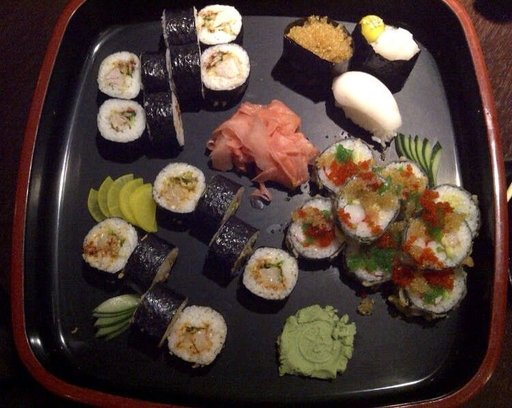

In [16]:
random_image_path = random.choice(image_path_list)
random_image_path

#Getting the image class from the path name parent directory
image_class = random_image_path.parent.stem
print(image_class)

#Open the image
img = Image.open(random_image_path)

#Print the metadata
print(f"Random image path: {random_image_path}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")

img

In [17]:
random_image_path = random.choice(image_path_list)
random_image_path

PosixPath('data_pizza_steak_sushi/pizza_steak_sushi/test/pizza/2508636.jpg')

#### Visualizing data with Matplotlib

In [18]:
import matplotlib.pyplot as plt
import numpy as np

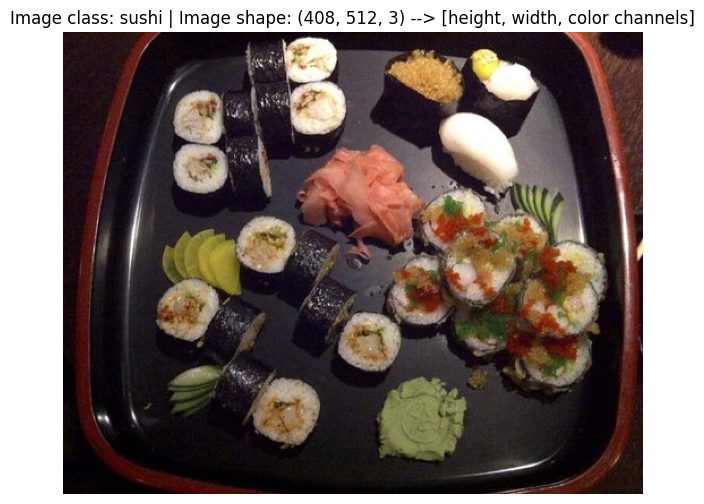

In [19]:
img_as_array = np.asarray(img)
plt.figure(figsize=(8,6))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} --> [height, width, color channels]")
plt.axis(False);

In [20]:
img_as_array

array([[[33, 13, 15],
        [30, 10, 12],
        [30, 10, 12],
        ...,
        [23, 14, 19],
        [21, 12, 17],
        [20, 11, 16]],

       [[35, 15, 17],
        [32, 12, 14],
        [31, 11, 13],
        ...,
        [21, 12, 17],
        [19, 10, 15],
        [19, 10, 15]],

       [[34, 15, 17],
        [31, 12, 14],
        [30, 11, 13],
        ...,
        [19,  9, 17],
        [18,  8, 16],
        [18,  8, 16]],

       ...,

       [[11,  6, 12],
        [11,  6, 12],
        [11,  6, 12],
        ...,
        [33, 19, 18],
        [33, 19, 19],
        [31, 17, 17]],

       [[ 8,  3,  9],
        [ 9,  4, 10],
        [ 9,  4, 10],
        ...,
        [36, 21, 18],
        [32, 16, 16],
        [27, 11, 11]],

       [[ 4,  0,  5],
        [ 5,  0,  6],
        [ 6,  1,  7],
        ...,
        [36, 21, 18],
        [32, 16, 16],
        [25,  9,  9]]], dtype=uint8)

#### Transforming data to right shaped tensor
Since the dataset is of the order HxWxC, we need to change it to CxHxW format to use with Pytorch

In [21]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [22]:
#Transforming data with torchvision.transform
#jpeg --> resize to 64x64 --> Flip randomly horizontal to increase randomness --> correct ordered tensor CxHxW

data_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                     transforms.RandomHorizontalFlip(p=0.5),
                                     transforms.ToTensor()])
print(data_transform(img).shape)
print(data_transform(img).dtype)

torch.Size([3, 64, 64])
torch.float32


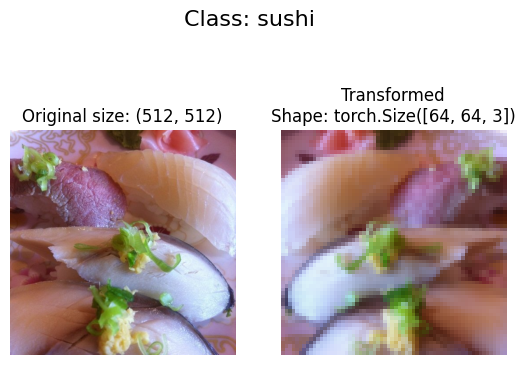

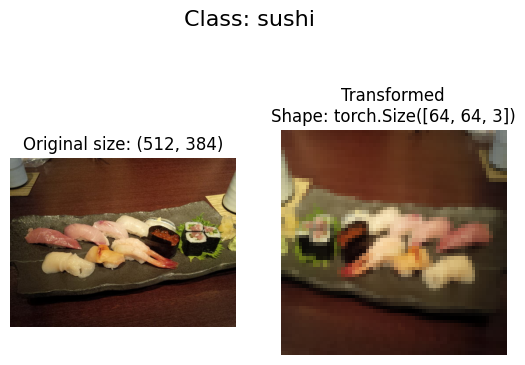

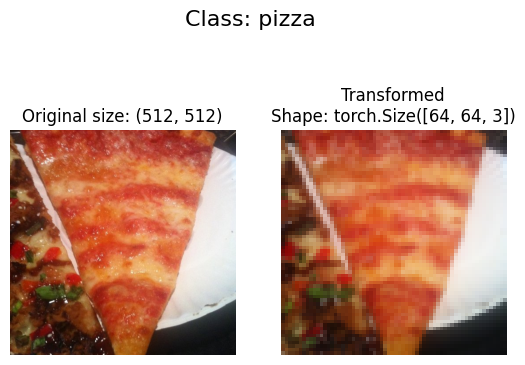

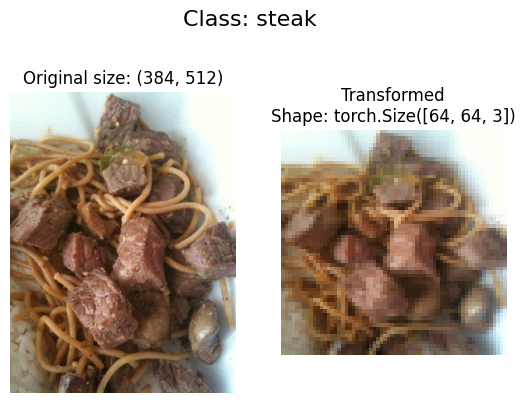

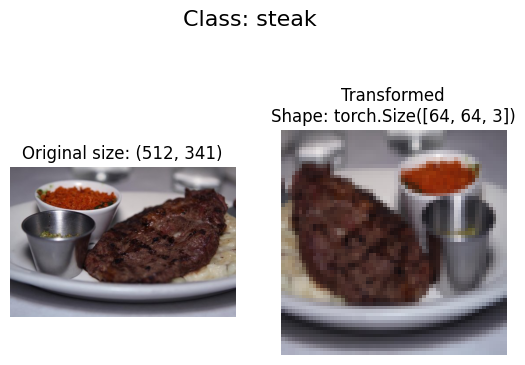

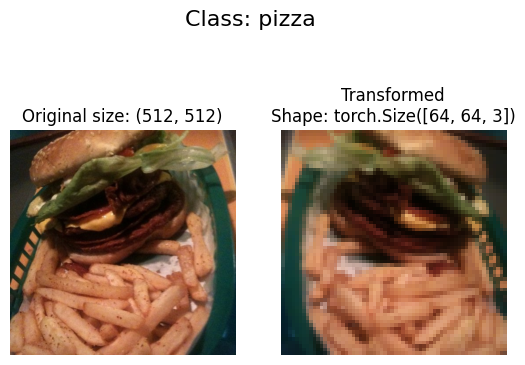

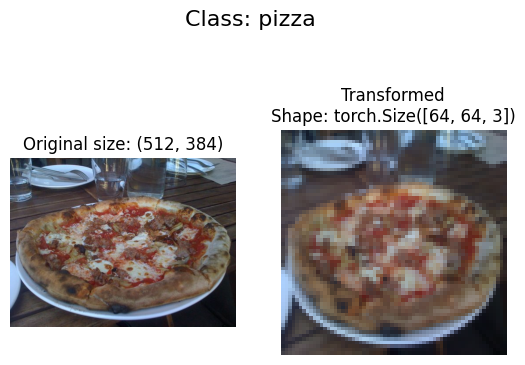

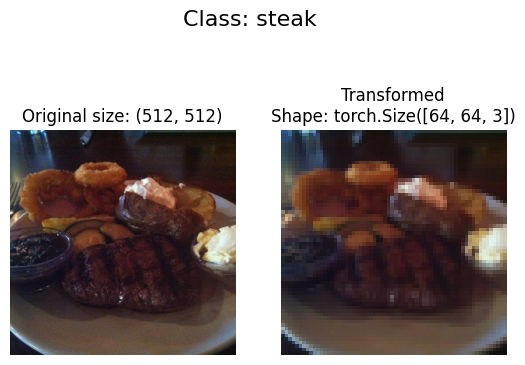

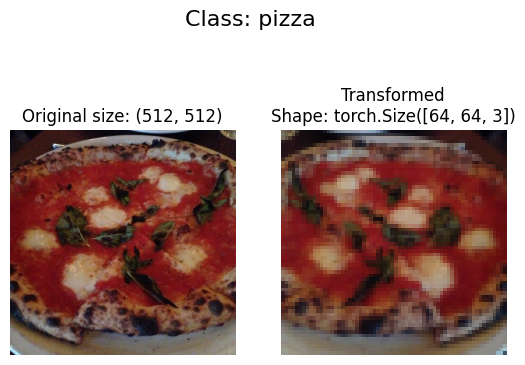

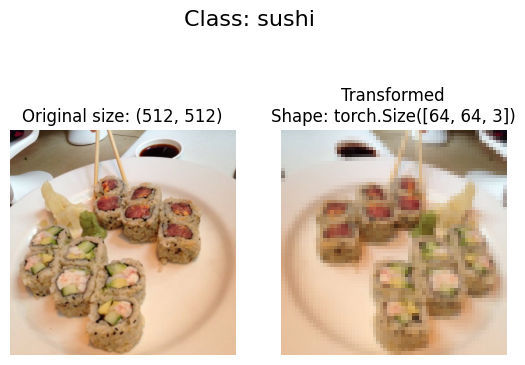

In [23]:
def plot_transformed_images(image_paths, transform, n, seed=None):
    #Takes random image, transforms, then compares original vs transformed image
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original size: {f.size}")
            ax[0].axis(False)

            transformed_image = transform(f).permute(1,2,0) #to HxWxC
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                       transform=data_transform,
                       n=10,
                       seed=1289)


#### Using Imagefolder function of Torchvision.datasets to load images

In [24]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data_pizza_steak_sushi/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data_pizza_steak_sushi/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [25]:
dir(train_data)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_format_transform_repr',
 '_is_protocol',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'extensions',
 'extra_repr',
 'find_classes',
 'imgs',
 'loader',
 'make_dataset',
 'root',
 'samples',
 'target_transform',
 'targets',
 'transform',
 'transforms']

In [26]:
class_names = train_data.classes

In [27]:
class_dict = train_data.class_to_idx

In [28]:
len(train_data), len(test_data)

(225, 75)

In [29]:
train_data[0][0].shape

torch.Size([3, 64, 64])

In [30]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label:{label}")
print(f"Image label datatype:{type(label)}")

Image tensor:
tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

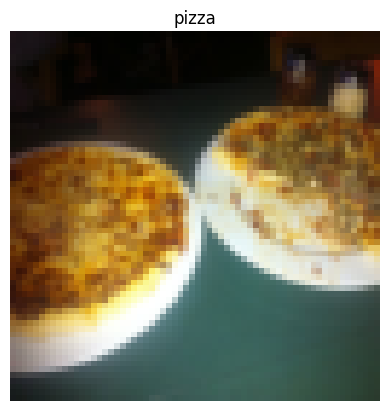

In [31]:
plt.imshow(img.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False);

#### Moving data to data loaders

In [32]:
!nvidia-smi

Wed May 17 22:40:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
| N/A   62C    P8    12W /  60W |     46MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [33]:
import os
os.cpu_count()

12

In [34]:
from torch.utils.data import DataLoader
BATCH_SIZE=1

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True
                             )
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False
                            )

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f0b25b3fc40>,
 <torch.utils.data.dataloader.DataLoader at 0x7f0b25b3e6e0>)

In [35]:
train_dataloader

In [36]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [37]:
img, label = next(iter(train_dataloader))
print(f"Image shape: {img.shape}")
print(f"Label: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64])
Label: torch.Size([1])


#### Loading image Data with a custom `Dataset`

1. Want to be able to load images from files
2. Want to be able to get class names list from Dataset
3. Want to be able to get class dictionary from Dataset

In [38]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset #All custom datasets inherit from this
from torchvision import transforms
from typing import Tuple, Dict, List #This is for typecasting, read more

In [39]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

The above is what we want to recreate

In [40]:
%pwd

'/media/pranshumaan/TOSHIBA EXT/Dev/Deep_Learning_Pytorch_Udemy_Tutorial'

In [41]:
target_directory = train_dir
print(f"Target directory: {target_directory}")
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target directory: data_pizza_steak_sushi/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [42]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    classes = sorted([entry.name for entry in os.scandir(target_directory) if entry.is_dir()])
    if not classes:
        raise FileNotFoundError(f"Could not find any classes in {directory}")
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    return classes, class_to_idx

In [43]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [44]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
    def __init__(self, targ_dir: str, transform=None):
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(targ_dir)
        
    def load_image(self, index: int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)
    
    def __len__(self) -> int:
        return len(self.paths)
    
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        #Returns one sample of data, data and label (X,y)
        img = self.load_image(index)
        class_name = self.paths[index].parent.name #expects path in format: data_folder/class_name/image
        class_idx = self.class_to_idx[class_name]
        
        if self.transform:
            return self.transform(img), class_idx
        
        else:
            return img, class_idx

In [45]:
from torchvision import transforms
train_transforms = transforms.Compose([transforms.Resize(size=(64,64)),
                                       transforms.RandomHorizontalFlip(p=0.5),
                                       transforms.ToTensor()])
test_transforms = transforms.Compose([transforms.Resize(size=(64,64)),
                                       transforms.ToTensor()])

In [46]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                      transform=test_transforms)

In [47]:
train_data_custom

In [48]:
test_data_custom

In [49]:
len(test_data_custom)

75

In [50]:
test_data_custom.classes

['pizza', 'steak', 'sushi']

In [51]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [52]:
#Check for equality between original image folder dataset and Imagefoldercustomdataset

In [53]:
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


In [54]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    if n>10:
        n=10
        display_shape = False
        print(f"For display purposes, n should not be greater than 10")
    if seed:
        random.seed(seed)
    random_sample_idx = random.sample(range(len(dataset)), k=n)
    
    plt.figure(figsize=(16,8))
    
    for i, targ_sample in enumerate(random_sample_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
        targ_image_adjust = targ_image.permute(1,2,0)
        
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis('off')
        if classes:
            title = f"Class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)    

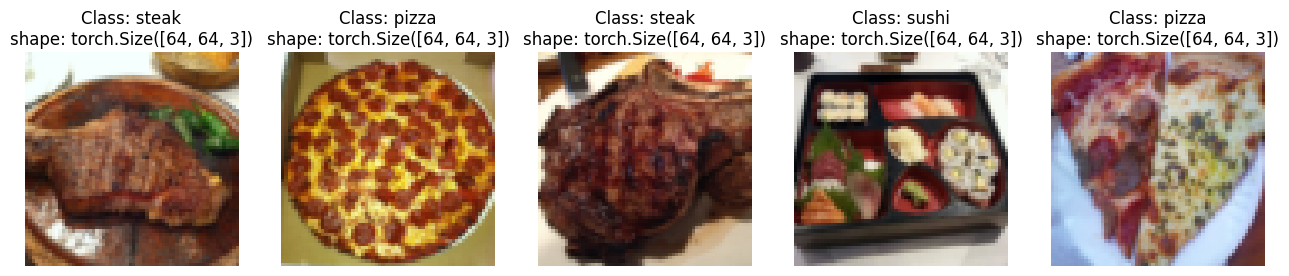

In [55]:
display_random_images(train_data,
                      class_names,
                      n=5,
                      seed=7)

For display purposes, n should not be greater than 10


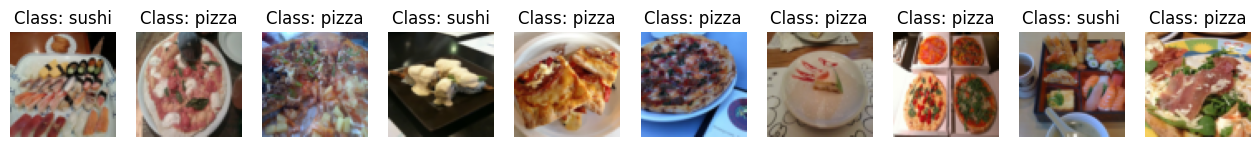

In [56]:
display_random_images(train_data_custom,
                      class_names,
                      n=20,

                      seed=42)

#### Batchifying the dataset with a data loader

In [57]:
BATCH_SIZE

1

In [58]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7f0b25723ca0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f0b257203a0>)

In [59]:
img_custom, label_custom = next(iter(train_dataloader_custom))

In [60]:
img_custom, label_custom

(tensor([[[[0.0392, 0.0353, 0.0824,  ..., 0.0078, 0.0078, 0.0118],
           [0.0392, 0.0275, 0.0549,  ..., 0.0706, 0.0745, 0.1020],
           [0.0353, 0.0235, 0.0510,  ..., 0.1529, 0.1176, 0.1020],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0039, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[0.0275, 0.0157, 0.0549,  ..., 0.0078, 0.0039, 0.0078],
           [0.0157, 0.0118, 0.0392,  ..., 0.0667, 0.0745, 0.1020],
           [0.0078, 0.0118, 0.0353,  ..., 0.1451, 0.1098, 0.0902],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0039, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[0.0078, 0.0078, 0.0235,  ..., 0.0039, 0.0078, 0.0078],
           [0.0039, 0.0078, 0.0196,  ..., 0.0431, 0.0549, 0.0902],
           [0.0039, 0.00

In [61]:
img_custom.shape

torch.Size([32, 3, 64, 64])

#### Data augmentation

From wikipedia: Data augmentation is a technique in machine learning used to reduce overfitting when training a machine learning model, by training models on several slightly-modified copies of existing data. 

In [62]:
from torchvision import transforms

train_transforms = transforms.Compose([transforms.Resize(size=(64,64)),
                                       transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                       transforms.ToTensor()]
                                     )

test_transforms = transforms.Compose([transforms.Resize(size=(64,64)),
                                       transforms.ToTensor()]
                                     )

In [63]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data_pizza_steak_sushi/pizza_steak_sushi/test/pizza/1152100.jpg'),
 PosixPath('data_pizza_steak_sushi/pizza_steak_sushi/test/pizza/1503858.jpg'),
 PosixPath('data_pizza_steak_sushi/pizza_steak_sushi/test/pizza/1687143.jpg'),
 PosixPath('data_pizza_steak_sushi/pizza_steak_sushi/test/pizza/1925494.jpg'),
 PosixPath('data_pizza_steak_sushi/pizza_steak_sushi/test/pizza/194643.jpg'),
 PosixPath('data_pizza_steak_sushi/pizza_steak_sushi/test/pizza/195160.jpg'),
 PosixPath('data_pizza_steak_sushi/pizza_steak_sushi/test/pizza/2003290.jpg'),
 PosixPath('data_pizza_steak_sushi/pizza_steak_sushi/test/pizza/2019408.jpg'),
 PosixPath('data_pizza_steak_sushi/pizza_steak_sushi/test/pizza/2111981.jpg'),
 PosixPath('data_pizza_steak_sushi/pizza_steak_sushi/test/pizza/2124579.jpg')]

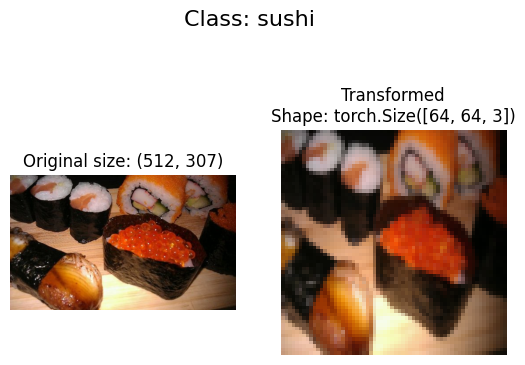

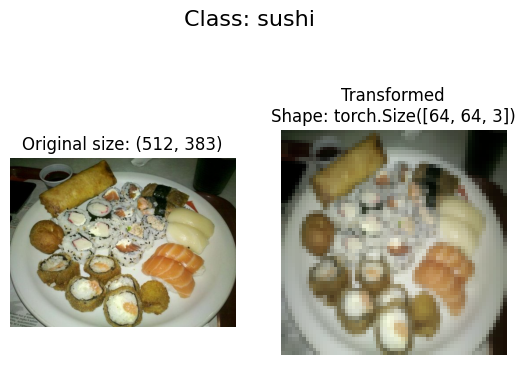

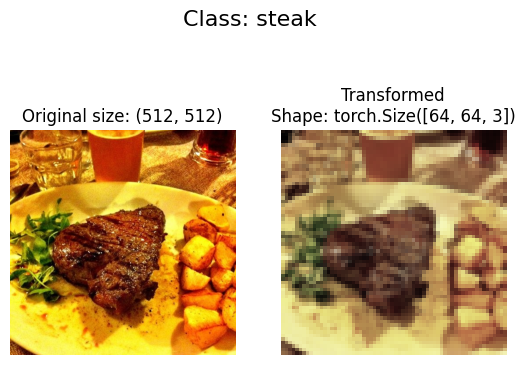

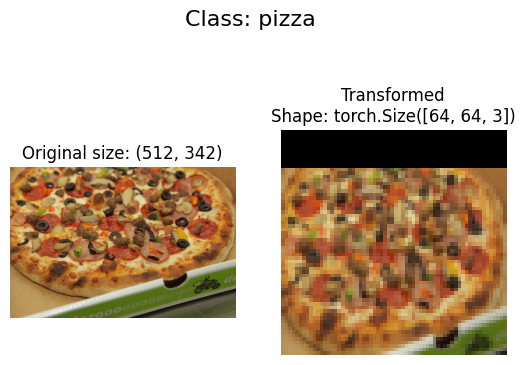

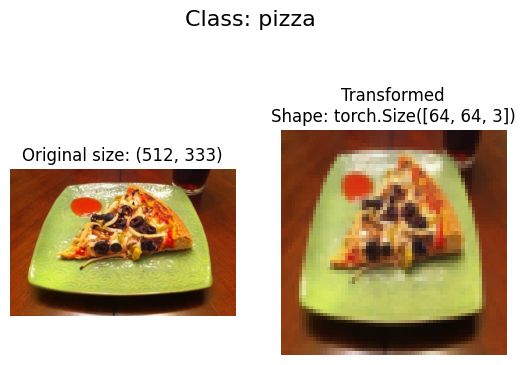

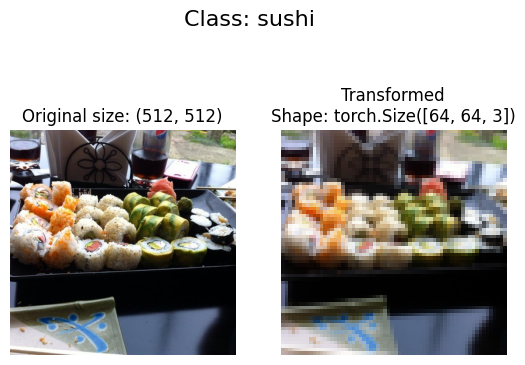

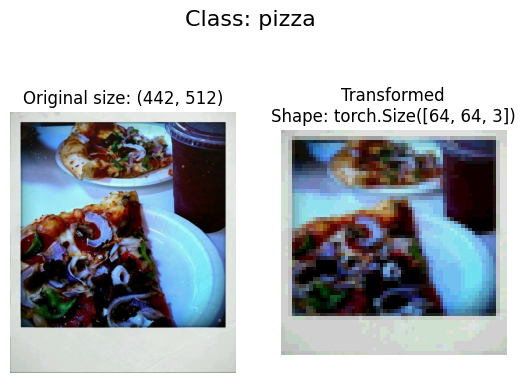

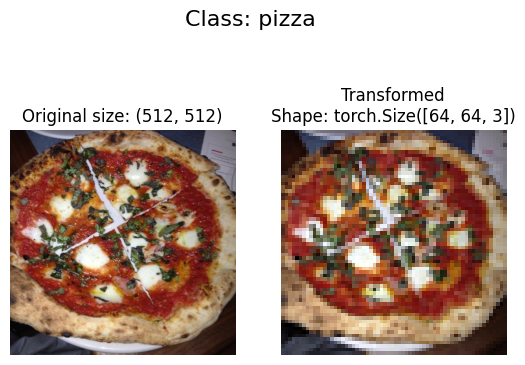

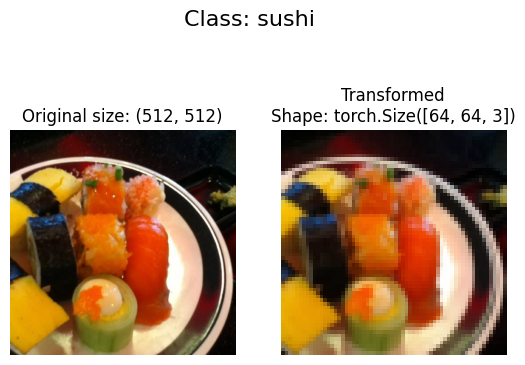

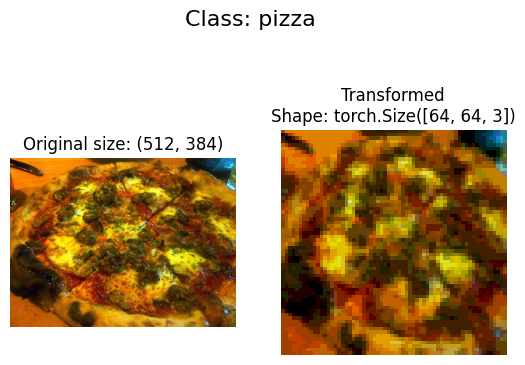

In [64]:
# Plot random transformed images
plot_transformed_images(image_paths = image_path_list,
                        transform = train_transforms,
                        n=10,
                        seed = None)

#### Model 0: Replicating the TinymVGG architecture

In [65]:
simple_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                       transforms.ToTensor()]
                                     )

In [66]:
# Load and transform data

from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform,
                                        )
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

# Turn the datasets into Dataloaders

import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# Create the dataloader

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)


test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=False,
                                     num_workers=NUM_WORKERS)

#### Tiny VGG model

In [67]:
class TinyVGG(nn.Module):
    # Model architecture copying Tiny VGG from CNN Explainer
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:
        super().__init__()
        
        self.conv_block_1 = nn.Sequential(nn.Conv2d(in_channels=input_shape,
                                                    out_channels=hidden_units,
                                                    kernel_size=3,
                                                    stride=1,
                                                    padding=0),
                                         nn.ReLU(),
                                         nn.Conv2d(in_channels=hidden_units,
                                                   out_channels=hidden_units,
                                                   kernel_size=3,
                                                   stride=1,
                                                   padding=1),
                                         nn.ReLU(),
                                         nn.MaxPool2d(kernel_size=2,
                                                      stride=2)
                                         )
        
        self.conv_block_2 = nn.Sequential(nn.Conv2d(in_channels=hidden_units,
                                                    out_channels=hidden_units,
                                                    kernel_size=3,
                                                    stride=1,
                                                    padding=0),
                                         nn.ReLU(),
                                         nn.Conv2d(in_channels=hidden_units,
                                                   out_channels=hidden_units,
                                                   kernel_size=3,
                                                   stride=1,
                                                   padding=0),
                                         nn.ReLU(),
                                         nn.MaxPool2d(kernel_size=2,
                                                      stride=2)
                                         )
        self.classifier = nn.Sequential(nn.Flatten(),
                                        nn.Linear(in_features=hidden_units*13*13,
                                                  out_features=output_shape))
        
    def forward(self, x):
        x = self.conv_block_1(x)
#         print(x.shape)
        x = self.conv_block_2(x)
#         print(x.shape)
        x = self.classifier(x)
#         print(x.shape)

        return x

In [68]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, #colour channels
                  hidden_units=10, #arbitrary hyperparameter
                  output_shape=len(class_names)).to(device) #number of classes

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

#### Try a forward pass on a single image
To test the model and get the shape to pass to the classifier

In [69]:
image_batch, label_batch = next(iter(train_dataloader_simple))

In [70]:
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [71]:
model_0(image_batch.to(device))

tensor([[ 0.0202, -0.0020,  0.0101],
        [ 0.0185,  0.0031,  0.0065],
        [ 0.0183,  0.0010,  0.0090],
        [ 0.0246, -0.0037,  0.0092],
        [ 0.0192,  0.0009,  0.0104],
        [ 0.0208,  0.0020,  0.0051],
        [ 0.0219,  0.0005,  0.0125],
        [ 0.0214, -0.0022,  0.0097],
        [ 0.0248, -0.0045,  0.0082],
        [ 0.0193, -0.0005,  0.0111],
        [ 0.0225, -0.0010,  0.0092],
        [ 0.0219, -0.0020,  0.0097],
        [ 0.0212, -0.0043,  0.0082],
        [ 0.0228, -0.0011,  0.0100],
        [ 0.0211, -0.0047,  0.0090],
        [ 0.0216, -0.0042,  0.0102],
        [ 0.0217, -0.0052,  0.0109],
        [ 0.0214, -0.0017,  0.0084],
        [ 0.0200, -0.0002,  0.0087],
        [ 0.0188,  0.0015,  0.0082],
        [ 0.0200,  0.0014,  0.0086],
        [ 0.0197, -0.0034,  0.0103],
        [ 0.0220, -0.0002,  0.0084],
        [ 0.0241, -0.0026,  0.0094],
        [ 0.0218, -0.0021,  0.0089],
        [ 0.0177,  0.0026,  0.0076],
        [ 0.0213, -0.0019,  0.0084],
 

In [72]:
# Read up on torchinfo module

In [73]:
from torchinfo import summary

model = TinyVGG(input_shape=3, #colour channels
                  hidden_units=10, #arbitrary hyperparameter
                  output_shape=len(class_names)).to(device) #number of classes

batch_size = 32
summary(model, input_size=(batch_size, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 31, 31]          --
│    └─Conv2d: 2-1                       [32, 10, 62, 62]          280
│    └─ReLU: 2-2                         [32, 10, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 10, 62, 62]          910
│    └─ReLU: 2-4                         [32, 10, 62, 62]          --
│    └─MaxPool2d: 2-5                    [32, 10, 31, 31]          --
├─Sequential: 1-2                        [32, 10, 13, 13]          --
│    └─Conv2d: 2-6                       [32, 10, 29, 29]          910
│    └─ReLU: 2-7                         [32, 10, 29, 29]          --
│    └─Conv2d: 2-8                       [32, 10, 27, 27]          910
│    └─ReLU: 2-9                         [32, 10, 27, 27]          --
│    └─MaxPool2d: 2-10                   [32, 10, 13, 13]          --
├─Sequentia

#### Training and testing functions

In [74]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: device):
    model.train()
    
    train_loss, train_acc = 0,0
    
    for batch, (X,y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class==y).sum().item()/len(y_pred_class)
    
    #per batch
    train_loss = train_loss/len(dataloader)
    train_acc = train_acc/len(dataloader)
    
    return train_loss, train_acc

In [75]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: device):
    
    model.eval()
    with torch.inference_mode():
        test_loss, test_acc = 0,0

        for batch, (X,y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            y_test_pred = model(X)
            loss = loss_fn(y_test_pred, y)
            test_loss += loss.item()

            y_test_pred_class = torch.argmax(torch.softmax(y_test_pred, dim=1), dim=1)
            test_acc += (y_test_pred_class==y).sum().item()/len(y_test_pred_class)

        #per batch
        test_loss = test_loss/len(dataloader)
        test_acc = test_acc/len(dataloader)
        
        return test_loss, test_acc

#### Combining the train step and test step into one function

In [76]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device = device):
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model_0,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        test_loss, test_acc = test_step(model=model_0,
                                         dataloader=test_dataloader,
                                         loss_fn=loss_fn,
                                         device=device)
        
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Train acc: {train_acc:.0%} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.0%}")
        
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results
        

In [77]:
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

In [78]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 10

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr = 0.001)

from timeit import default_timer as timer
start_timer = timer()

model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device = device)

stop_timer = timer()
print(f"Total training time: {stop_timer-start_timer:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 1.1054 | Train acc: 25% | Test loss: 1.0948 | Test acc: 25%
Epoch: 1 | Train Loss: 1.0835 | Train acc: 43% | Test loss: 1.1101 | Test acc: 26%
Epoch: 2 | Train Loss: 1.0712 | Train acc: 43% | Test loss: 1.1411 | Test acc: 26%
Epoch: 3 | Train Loss: 1.0932 | Train acc: 31% | Test loss: 1.1266 | Test acc: 29%
Epoch: 4 | Train Loss: 1.0481 | Train acc: 57% | Test loss: 1.1051 | Test acc: 28%
Epoch: 5 | Train Loss: 1.0473 | Train acc: 45% | Test loss: 1.0539 | Test acc: 33%
Epoch: 6 | Train Loss: 0.9037 | Train acc: 59% | Test loss: 1.0579 | Test acc: 37%
Epoch: 7 | Train Loss: 0.9242 | Train acc: 58% | Test loss: 0.9776 | Test acc: 40%
Epoch: 8 | Train Loss: 0.9430 | Train acc: 48% | Test loss: 1.0027 | Test acc: 37%
Epoch: 9 | Train Loss: 0.8896 | Train acc: 44% | Test loss: 0.8978 | Test acc: 58%
Total training time: 12.528 seconds


In [79]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [80]:
def plot_loss_curves(results: Dict[str, List[float]]):
    # plots training curve of a result dictionary
    loss = results["train_loss"]
    test_loss = results["test_loss"]
    
    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]
    
    epochs = range(len(results["train_loss"]))
    
    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label="Training Loss")
    plt.plot(epochs, test_loss, label="Test Loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(epochs, accuracy, label="Training Accuracy")
    plt.plot(epochs, test_accuracy, label="Test Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

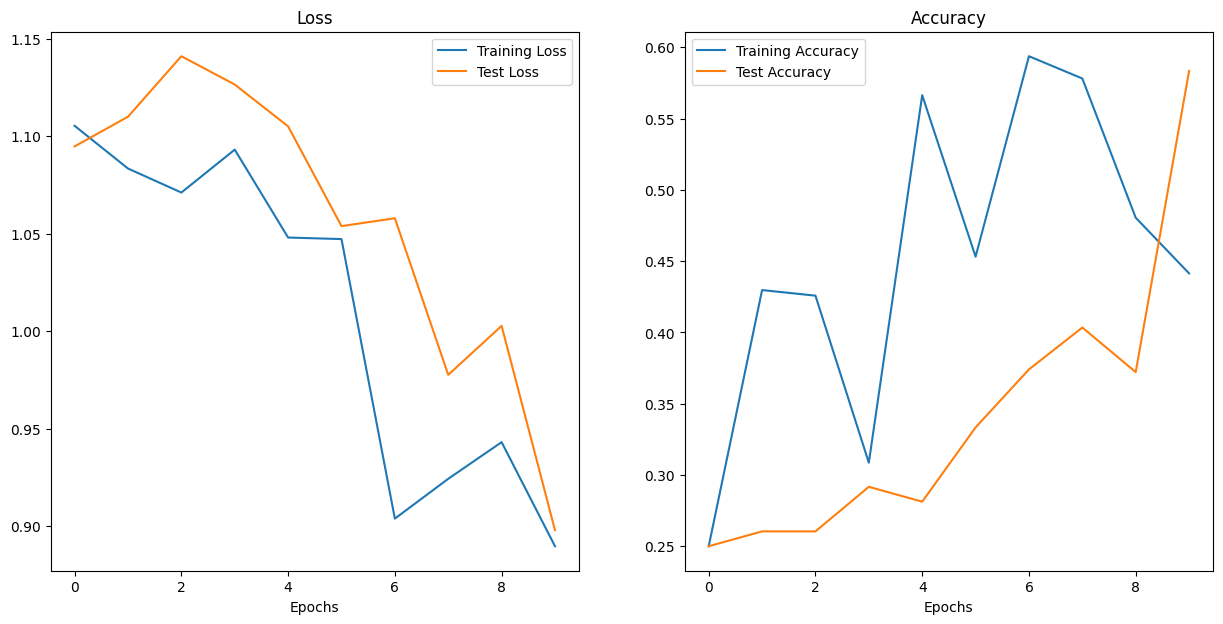

In [81]:
plot_loss_curves(model_0_results)